In [2]:
from __future__ import print_function
from __future__ import division
import random
import pprint
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torchvision import transforms, utils
from CubeDataset import CubeDataset
import transforms
from transforms_custom import Rescale, ToTensor
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.keypoint_rcnn import KeypointRCNNPredictor
from engine import train_one_epoch
import utils
import vis

plt.ion()

## Dataset

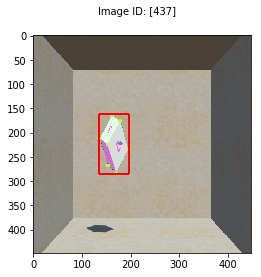

In [3]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

num_classes = 2

dataset = CubeDataset('data/keypoints_data', transforms.Compose([Rescale(448), ToTensor()]))

data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=8,
    collate_fn=utils.collate_fn)

idx = random.randint(0, len(dataset)-1)

vis.vis_one(dataset[idx][0], dataset[idx][1])

## Model

In [6]:
# get pretrained model
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True)

# reinitialize roi_heads for box predictor and keypoint predictor
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model.roi_heads.keypoint_predictor = KeypointRCNNPredictor(512, 8)

# eventually load pretrained model
model.load_state_dict(torch.load('models/model10092019', map_location=device))

model.to(device);

## Optimizer, scheduler

In [7]:
params = [p for p in model.parameters() if p.requires_grad]

optimizer = torch.optim.SGD(params, lr=0.008, momentum=0.9, weight_decay=0.0005)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

## Training

In [5]:
num_of_epochs = 10
for epoch in range(num_of_epochs):
    # function train_one_epoch from https://github.com/pytorch/vision/blob/master/references/detection/engine.py
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)

    lr_scheduler.step()

# save retrained model
torch.save(model.state_dict(), 'model')

Epoch: [0]  [  0/484]  eta: 0:55:39  lr: 0.000025  loss: 8.8827 (8.8827)  loss_classifier: 0.6765 (0.6765)  loss_box_reg: 0.0420 (0.0420)  loss_keypoint: 8.0565 (8.0565)  loss_objectness: 0.1009 (0.1009)  loss_rpn_box_reg: 0.0068 (0.0068)  time: 6.8994  data: 4.2013  max mem: 1764
Epoch: [0]  [ 10/484]  eta: 0:13:10  lr: 0.000190  loss: 8.8581 (8.8272)  loss_classifier: 0.6430 (0.6130)  loss_box_reg: 0.0387 (0.0386)  loss_keypoint: 8.0709 (8.0670)  loss_objectness: 0.0861 (0.1013)  loss_rpn_box_reg: 0.0073 (0.0073)  time: 1.6675  data: 0.3820  max mem: 2099
Epoch: [0]  [ 20/484]  eta: 0:11:11  lr: 0.000355  loss: 8.6798 (8.6768)  loss_classifier: 0.4285 (0.4539)  loss_box_reg: 0.0433 (0.0472)  loss_keypoint: 8.0709 (8.0696)  loss_objectness: 0.0861 (0.0989)  loss_rpn_box_reg: 0.0067 (0.0071)  time: 1.1751  data: 0.0025  max mem: 2101
Epoch: [0]  [ 30/484]  eta: 0:10:27  lr: 0.000521  loss: 8.3570 (8.5476)  loss_classifier: 0.1477 (0.3448)  loss_box_reg: 0.0647 (0.0549)  loss_keypoint: 

Epoch: [1]  [ 70/484]  eta: 0:10:05  lr: 0.008000  loss: 2.7217 (2.7366)  loss_classifier: 0.0147 (0.0155)  loss_box_reg: 0.0047 (0.0053)  loss_keypoint: 2.7032 (2.7134)  loss_objectness: 0.0000 (0.0003)  loss_rpn_box_reg: 0.0016 (0.0020)  time: 1.4599  data: 0.0018  max mem: 2344
Epoch: [1]  [ 80/484]  eta: 0:09:47  lr: 0.008000  loss: 2.5962 (2.7089)  loss_classifier: 0.0144 (0.0153)  loss_box_reg: 0.0038 (0.0051)  loss_keypoint: 2.5824 (2.6862)  loss_objectness: 0.0001 (0.0003)  loss_rpn_box_reg: 0.0013 (0.0020)  time: 1.4136  data: 0.0017  max mem: 2344
Epoch: [1]  [ 90/484]  eta: 0:09:28  lr: 0.008000  loss: 2.6006 (2.7108)  loss_classifier: 0.0126 (0.0151)  loss_box_reg: 0.0034 (0.0049)  loss_keypoint: 2.5837 (2.6886)  loss_objectness: 0.0001 (0.0003)  loss_rpn_box_reg: 0.0014 (0.0019)  time: 1.3728  data: 0.0009  max mem: 2344
Epoch: [1]  [100/484]  eta: 0:09:11  lr: 0.008000  loss: 2.6859 (2.7151)  loss_classifier: 0.0133 (0.0149)  loss_box_reg: 0.0030 (0.0047)  loss_keypoint: 

Epoch: [2]  [140/484]  eta: 0:08:12  lr: 0.008000  loss: 2.4328 (2.5009)  loss_classifier: 0.0122 (0.0103)  loss_box_reg: 0.0033 (0.0029)  loss_keypoint: 2.4170 (2.4854)  loss_objectness: 0.0001 (0.0004)  loss_rpn_box_reg: 0.0017 (0.0019)  time: 1.4018  data: 0.0000  max mem: 2344
Epoch: [2]  [150/484]  eta: 0:07:57  lr: 0.008000  loss: 2.5623 (2.5127)  loss_classifier: 0.0107 (0.0103)  loss_box_reg: 0.0029 (0.0029)  loss_keypoint: 2.5465 (2.4973)  loss_objectness: 0.0001 (0.0004)  loss_rpn_box_reg: 0.0013 (0.0019)  time: 1.4111  data: 0.0009  max mem: 2344
Epoch: [2]  [160/484]  eta: 0:07:44  lr: 0.008000  loss: 2.5631 (2.5103)  loss_classifier: 0.0101 (0.0104)  loss_box_reg: 0.0026 (0.0029)  loss_keypoint: 2.5518 (2.4948)  loss_objectness: 0.0001 (0.0004)  loss_rpn_box_reg: 0.0013 (0.0019)  time: 1.4442  data: 0.0025  max mem: 2344
Epoch: [2]  [170/484]  eta: 0:07:29  lr: 0.008000  loss: 2.4896 (2.5111)  loss_classifier: 0.0114 (0.0104)  loss_box_reg: 0.0027 (0.0029)  loss_keypoint: 

Epoch: [3]  [210/484]  eta: 0:06:32  lr: 0.000800  loss: 2.2774 (2.3017)  loss_classifier: 0.0069 (0.0079)  loss_box_reg: 0.0014 (0.0017)  loss_keypoint: 2.2650 (2.2907)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0009 (0.0012)  time: 1.3995  data: 0.0009  max mem: 2344
Epoch: [3]  [220/484]  eta: 0:06:18  lr: 0.000800  loss: 2.2437 (2.2986)  loss_classifier: 0.0064 (0.0079)  loss_box_reg: 0.0016 (0.0017)  loss_keypoint: 2.2337 (2.2876)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0011 (0.0012)  time: 1.4299  data: 0.0002  max mem: 2344
Epoch: [3]  [230/484]  eta: 0:06:04  lr: 0.000800  loss: 2.1996 (2.2957)  loss_classifier: 0.0067 (0.0079)  loss_box_reg: 0.0016 (0.0017)  loss_keypoint: 2.1809 (2.2847)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0011 (0.0012)  time: 1.4379  data: 0.0010  max mem: 2344
Epoch: [3]  [240/484]  eta: 0:05:49  lr: 0.000800  loss: 2.2360 (2.2945)  loss_classifier: 0.0071 (0.0078)  loss_box_reg: 0.0016 (0.0017)  loss_keypoint: 

Epoch: [4]  [280/484]  eta: 0:05:27  lr: 0.000800  loss: 2.2281 (2.2430)  loss_classifier: 0.0078 (0.0075)  loss_box_reg: 0.0012 (0.0015)  loss_keypoint: 2.2129 (2.2327)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0010 (0.0012)  time: 1.4182  data: 0.0017  max mem: 2344
Epoch: [4]  [290/484]  eta: 0:05:10  lr: 0.000800  loss: 2.1977 (2.2410)  loss_classifier: 0.0072 (0.0074)  loss_box_reg: 0.0011 (0.0015)  loss_keypoint: 2.1896 (2.2306)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0011 (0.0012)  time: 1.4417  data: 0.0017  max mem: 2344
Epoch: [4]  [300/484]  eta: 0:04:52  lr: 0.000800  loss: 2.2370 (2.2455)  loss_classifier: 0.0063 (0.0074)  loss_box_reg: 0.0012 (0.0015)  loss_keypoint: 2.2302 (2.2351)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0008 (0.0012)  time: 1.4293  data: 0.0021  max mem: 2344
Epoch: [4]  [310/484]  eta: 0:04:35  lr: 0.000800  loss: 2.3335 (2.2489)  loss_classifier: 0.0067 (0.0074)  loss_box_reg: 0.0013 (0.0015)  loss_keypoint: 

Epoch: [5]  [350/484]  eta: 0:03:12  lr: 0.000800  loss: 2.2052 (2.2305)  loss_classifier: 0.0084 (0.0074)  loss_box_reg: 0.0012 (0.0015)  loss_keypoint: 2.1923 (2.2205)  loss_objectness: 0.0000 (0.0002)  loss_rpn_box_reg: 0.0009 (0.0011)  time: 1.4501  data: 0.0005  max mem: 2344
Epoch: [5]  [360/484]  eta: 0:02:58  lr: 0.000800  loss: 2.1770 (2.2296)  loss_classifier: 0.0084 (0.0074)  loss_box_reg: 0.0011 (0.0015)  loss_keypoint: 2.1645 (2.2195)  loss_objectness: 0.0000 (0.0002)  loss_rpn_box_reg: 0.0009 (0.0011)  time: 1.4549  data: 0.0005  max mem: 2344
Epoch: [5]  [370/484]  eta: 0:02:44  lr: 0.000800  loss: 2.1855 (2.2287)  loss_classifier: 0.0080 (0.0074)  loss_box_reg: 0.0014 (0.0015)  loss_keypoint: 2.1781 (2.2186)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0009 (0.0011)  time: 1.4941  data: 0.0016  max mem: 2344
Epoch: [5]  [380/484]  eta: 0:02:30  lr: 0.000800  loss: 2.1848 (2.2280)  loss_classifier: 0.0083 (0.0074)  loss_box_reg: 0.0014 (0.0015)  loss_keypoint: 

Epoch: [6]  [420/484]  eta: 0:01:32  lr: 0.000080  loss: 2.1746 (2.1943)  loss_classifier: 0.0070 (0.0073)  loss_box_reg: 0.0012 (0.0014)  loss_keypoint: 2.1636 (2.1845)  loss_objectness: 0.0000 (0.0001)  loss_rpn_box_reg: 0.0007 (0.0010)  time: 1.4860  data: 0.0026  max mem: 2344
Epoch: [6]  [430/484]  eta: 0:01:18  lr: 0.000080  loss: 2.1958 (2.1955)  loss_classifier: 0.0065 (0.0073)  loss_box_reg: 0.0012 (0.0014)  loss_keypoint: 2.1853 (2.1857)  loss_objectness: 0.0000 (0.0001)  loss_rpn_box_reg: 0.0007 (0.0010)  time: 1.4755  data: 0.0018  max mem: 2344
Epoch: [6]  [440/484]  eta: 0:01:04  lr: 0.000080  loss: 2.1533 (2.1945)  loss_classifier: 0.0065 (0.0073)  loss_box_reg: 0.0014 (0.0014)  loss_keypoint: 2.1460 (2.1847)  loss_objectness: 0.0000 (0.0001)  loss_rpn_box_reg: 0.0008 (0.0010)  time: 1.4925  data: 0.0015  max mem: 2344
Epoch: [6]  [450/484]  eta: 0:00:49  lr: 0.000080  loss: 2.1362 (2.1935)  loss_classifier: 0.0069 (0.0073)  loss_box_reg: 0.0011 (0.0014)  loss_keypoint: 

Epoch: [7]  [483/484]  eta: 0:00:01  lr: 0.000080  loss: 2.2313 (2.1883)  loss_classifier: 0.0065 (0.0069)  loss_box_reg: 0.0012 (0.0014)  loss_keypoint: 2.2233 (2.1789)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0008 (0.0010)  time: 1.4075  data: 0.0013  max mem: 2344
Epoch: [7] Total time: 0:11:43 (1.4542 s / it)
Epoch: [8]  [  0/484]  eta: 0:52:02  lr: 0.000080  loss: 2.0776 (2.0776)  loss_classifier: 0.0081 (0.0081)  loss_box_reg: 0.0011 (0.0011)  loss_keypoint: 2.0671 (2.0671)  loss_objectness: 0.0002 (0.0002)  loss_rpn_box_reg: 0.0012 (0.0012)  time: 6.4519  data: 4.9372  max mem: 2344
Epoch: [8]  [ 10/484]  eta: 0:14:35  lr: 0.000080  loss: 2.1600 (2.1506)  loss_classifier: 0.0066 (0.0073)  loss_box_reg: 0.0011 (0.0012)  loss_keypoint: 2.1452 (2.1412)  loss_objectness: 0.0001 (0.0001)  loss_rpn_box_reg: 0.0008 (0.0008)  time: 1.8461  data: 0.4503  max mem: 2344
Epoch: [8]  [ 20/484]  eta: 0:12:36  lr: 0.000080  loss: 2.1600 (2.1612)  loss_classifier: 0.0067 (0.0075) 

Epoch: [9]  [ 50/484]  eta: 0:11:06  lr: 0.000008  loss: 2.1363 (2.1802)  loss_classifier: 0.0063 (0.0069)  loss_box_reg: 0.0013 (0.0013)  loss_keypoint: 2.1289 (2.1707)  loss_objectness: 0.0000 (0.0002)  loss_rpn_box_reg: 0.0009 (0.0011)  time: 1.4085  data: 0.0021  max mem: 2344
Epoch: [9]  [ 60/484]  eta: 0:10:46  lr: 0.000008  loss: 2.1361 (2.1774)  loss_classifier: 0.0064 (0.0070)  loss_box_reg: 0.0012 (0.0013)  loss_keypoint: 2.1289 (2.1679)  loss_objectness: 0.0001 (0.0002)  loss_rpn_box_reg: 0.0008 (0.0011)  time: 1.4286  data: 0.0021  max mem: 2344
Epoch: [9]  [ 70/484]  eta: 0:10:29  lr: 0.000008  loss: 2.1807 (2.1806)  loss_classifier: 0.0069 (0.0071)  loss_box_reg: 0.0013 (0.0013)  loss_keypoint: 2.1689 (2.1710)  loss_objectness: 0.0001 (0.0001)  loss_rpn_box_reg: 0.0009 (0.0011)  time: 1.4802  data: 0.0021  max mem: 2344
Epoch: [9]  [ 80/484]  eta: 0:10:12  lr: 0.000008  loss: 2.1552 (2.1762)  loss_classifier: 0.0069 (0.0071)  loss_box_reg: 0.0012 (0.0013)  loss_keypoint: 

## Inference

In [23]:
model.eval()

# get random sample from dataset
idx = random.randint(0, len(dataset)-1)
sample = dataset[idx][0]
sample = sample[None, :, :, :].to(device)
# infere
pred = model(sample)

# expected results
print(dataset[idx][1]['keypoints'])
# observed results
print(pred[0]['keypoints'])

tensor([[[208.9362, 224.8485,   1.0000],
         [188.1991, 277.4546,   1.0000],
         [164.3319, 235.0303,   1.0000],
         [185.4603, 181.5758,   1.0000],
         [203.0672, 210.4243,   1.0000],
         [183.1127, 260.4849,   0.0000],
         [160.4192, 219.7576,   1.0000],
         [180.3738, 168.8485,   1.0000]]])
tensor([[[164.6553, 235.2294,   1.0000],
         [185.2164, 182.0744,   1.0000],
         [202.9990, 210.6102,   1.0000],
         [187.9950, 277.7533,   1.0000],
         [202.9990, 210.6102,   1.0000],
         [202.9990, 210.6102,   1.0000],
         [202.9990, 210.6102,   1.0000],
         [185.7721, 182.0744,   1.0000]]], device='cuda:0',
       grad_fn=<CopySlices>)
